## Fix `feature_selection` plots

In [4]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyod

2024-05-08 14:03:36.426309: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('moodify', path = data_real_path)

### Utility Functions 

In [3]:
def fix_feat_sel_plot(dataset,
                      model,
                      eval_model,
                      interpretation,
                      scenario,
                      plot_path=os.path.join(experiment_path,dataset.name,'plots_new','fs_plots'),
                      save=True,
                      box_loc=None,
                      rotation=False,
                      plot_image=True,
                      random=True,
                      change_ylim=False):
    
    path=os.path.join(experiment_path,dataset.name,'experiments','feature_selection',eval_model,f'{model}_{interpretation}',f'scenario_{str(scenario)}')
    file_path=get_most_recent_file(path)
    path_random=os.path.join(experiment_path,dataset.name,'experiments','feature_selection',eval_model,'random',f'scenario_{str(scenario)}')
    file_path_random=get_most_recent_file(path_random)
    if random:
        plot_feature_selection(file_path,plot_path=plot_path,precision_file_random=file_path_random,model=model,eval_model=eval_model,interpretation=interpretation,scenario=scenario,save_image=save,plot_image=plot_image,rotation=rotation,change_ylim=change_ylim)
    else:
        plot_feature_selection(file_path,plot_path=plot_path,model=model,eval_model=eval_model,interpretation=interpretation,scenario=scenario,save_image=save,plot_image=plot_image,rotation=rotation,change_ylim=change_ylim)

In [8]:
def draw_fs_plots(eval_model=['EIF+','EIF'],scenarios=[2,1],rotation=False):
    for model in eval_model:
        for scenario in scenarios:
            fix_feat_sel_plot(dataset=dataset,eval_model=model,model='EIF+',interpretation='EXIFFI+',scenario=scenario,plot_path=os.path.join(experiment_path,dataset.name,'plots_new','fs_plots'),save=True,plot_image=False,random=True,rotation=rotation)
            plt.close()
            fix_feat_sel_plot(dataset=dataset,eval_model=model,model='EIF',interpretation='EXIFFI',scenario=scenario,plot_path=os.path.join(experiment_path,dataset.name,'plots_new','fs_plots'),save=True,plot_image=False,random=True,rotation=rotation)
            plt.close()
            fix_feat_sel_plot(dataset=dataset,eval_model=model,model='IF',interpretation='DIFFI',scenario=scenario,plot_path=os.path.join(experiment_path,dataset.name,'plots_new','fs_plots'),save=True,plot_image=False,random=True,rotation=rotation)
            plt.close()
            fix_feat_sel_plot(dataset=dataset,eval_model=model,model='IF',interpretation='RandomForest',scenario=scenario,plot_path=os.path.join(experiment_path,dataset.name,'plots_new','fs_plots'),save=True,plot_image=False,random=True,rotation=rotation)
            plt.close()
            fix_feat_sel_plot(dataset=dataset,eval_model=model,model='EIF',interpretation='RandomForest',scenario=scenario,plot_path=os.path.join(experiment_path,dataset.name,'plots_new','fs_plots'),save=True,plot_image=False,random=True,rotation=rotation)
            plt.close()
            fix_feat_sel_plot(dataset=dataset,eval_model=model,model='EIF+',interpretation='RandomForest',scenario=scenario,plot_path=os.path.join(experiment_path,dataset.name,'plots_new','fs_plots'),save=True,plot_image=False,random=True,rotation=rotation)
            plt.close()

### `Yaxis`

In [10]:
dataset = Dataset('Yaxis', path = data_syn_path)

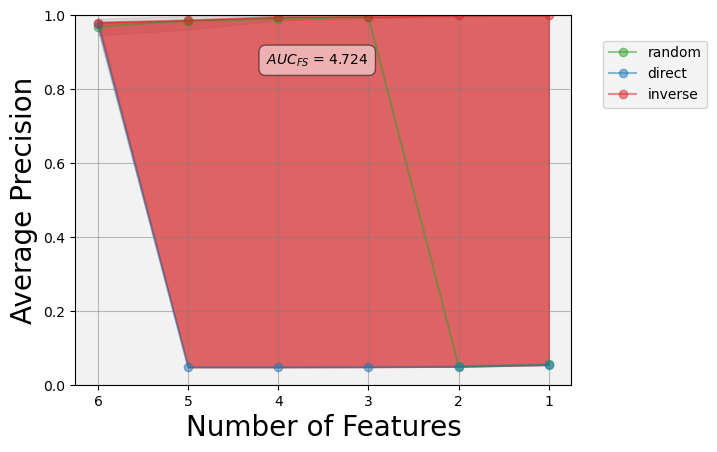

In [15]:
fix_feat_sel_plot(dataset=dataset,
                eval_model='EIF',
                model='EIF+',
                interpretation='EXIFFI+',
                scenario=2,
                save=True,
                plot_path=os.path.join(experiment_path,dataset.name,'plots_new','fs_plots'),
                plot_image=True)

In [ ]:
draw_fs_plots()

### `Xaxis`

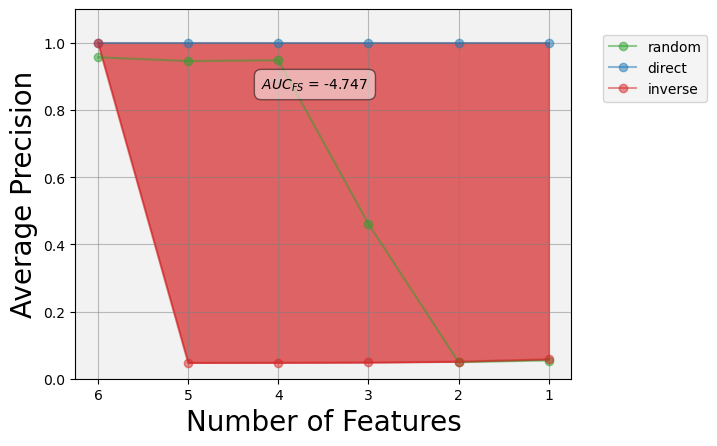

In [25]:
dataset = Dataset('Xaxis', path = data_syn_path)
fix_feat_sel_plot(dataset=dataset,
                eval_model='EIF+',
                model='IF',
                interpretation='EXIFFI',
                scenario=2,
                save=True,
                plot_path=os.path.join(experiment_path,dataset.name,'plots_new','fs_plots'),
                plot_image=True,
                change_ylim=True)

### `bisect_3d`

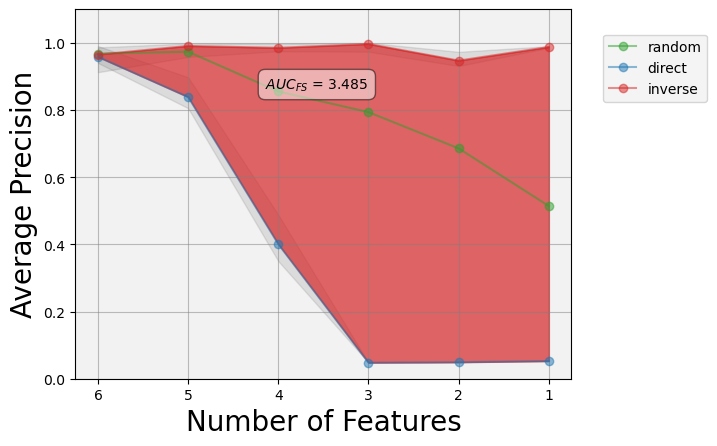

In [24]:
dataset = Dataset('bisect_3d', path = data_syn_path)
fix_feat_sel_plot(dataset=dataset,
                eval_model='EIF',
                model='IF',
                interpretation='EXIFFI',
                scenario=1,
                save=True,
                plot_path=os.path.join(experiment_path,dataset.name,'plots_new','fs_plots'),
                plot_image=True,
                change_ylim=True)

### `breastw`

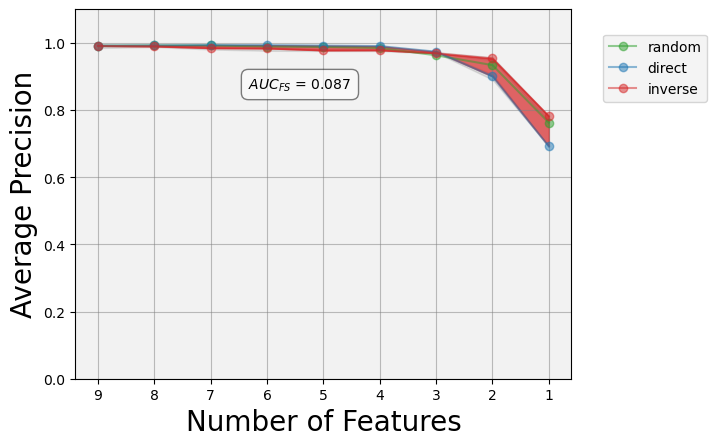

In [4]:
dataset = Dataset('breastw', path = data_real_path)
fix_feat_sel_plot(dataset=dataset,
                eval_model='EIF+',
                model='IF',
                interpretation='EXIFFI',
                scenario=2,
                save=True,
                plot_path=os.path.join(experiment_path,dataset.name,'plots_new','fs_plots'),
                plot_image=True,
                change_ylim=True)

### `diabetes`

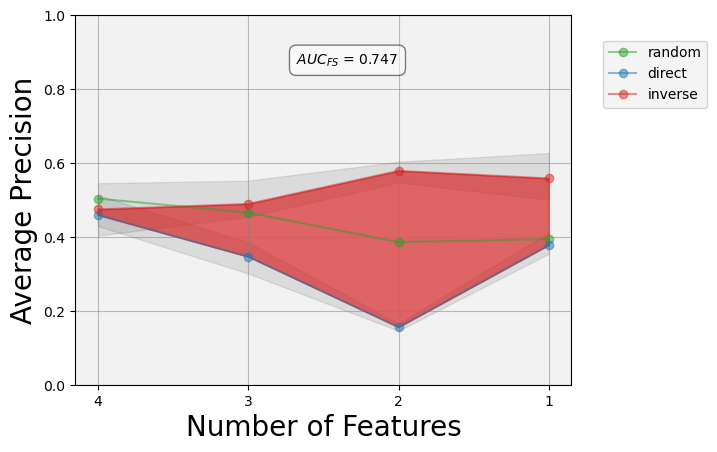

In [11]:
fix_feat_sel_plot(dataset,'EIF+','EIF+','EXIFFI+',1,save=False,plot_image=True)

### `moodify`

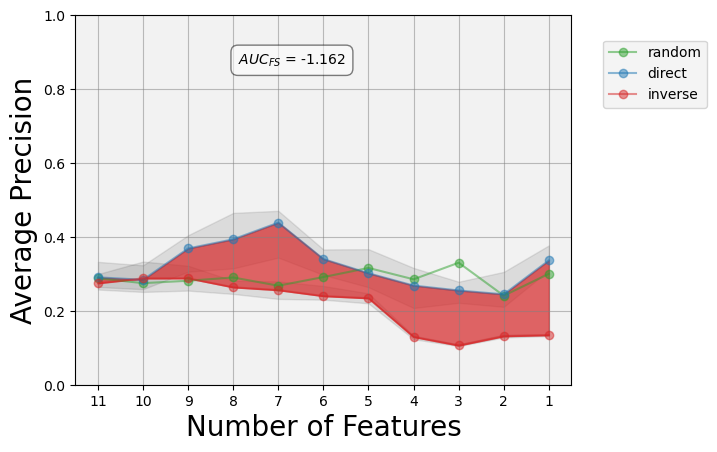

In [9]:
fix_feat_sel_plot(dataset,'IF','EIF+','EXIFFI',1,save=True,plot_image=True)

### `ionosphere`

In [48]:
datasaet=Dataset('ionosphere', path = data_real_path)

In [54]:
draw_fs_plots(rotation=True)

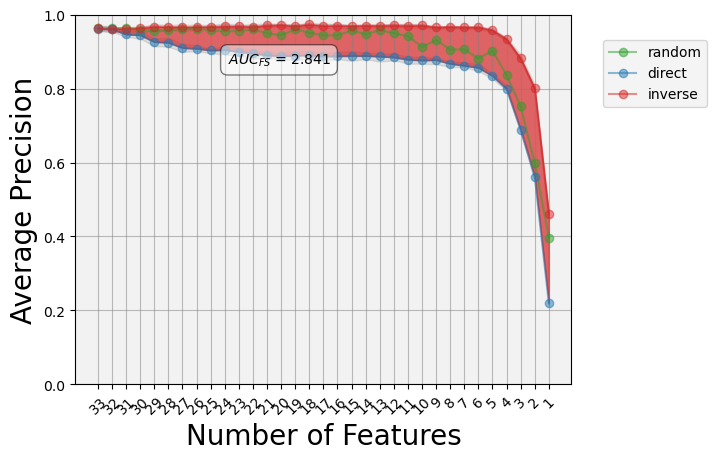

In [53]:
fix_feat_sel_plot(dataset=dataset,
                eval_model='EIF+',
                model='EIF',
                interpretation='EXIFFI',
                scenario=2,
                save=False,
                plot_image=True,
                rotation=True)

### `pendigits`

In [58]:
dataset=Dataset('pendigits', path = data_real_path)
dataset.shape

(6870, 16)

In [61]:
draw_fs_plots()

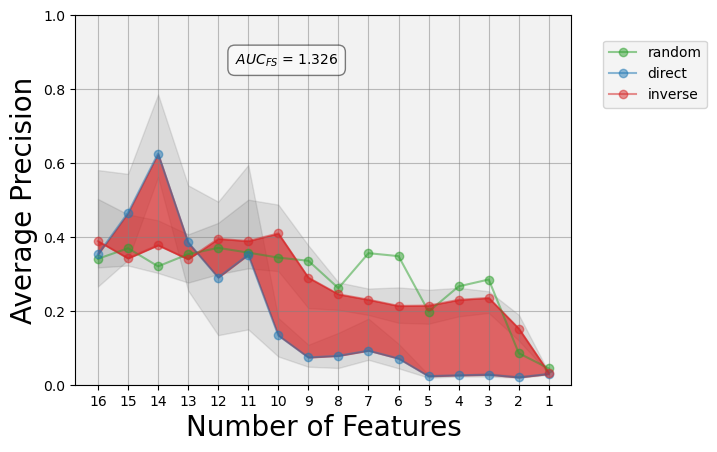

In [60]:
fix_feat_sel_plot(dataset=dataset,
                eval_model='EIF+',
                model='EIF+',
                interpretation='EXIFFI+',
                scenario=2,
                save=False,
                plot_image=True)

### `shuttle`

In [62]:
dataset=Dataset('shuttle', path = data_real_path)
dataset.shape

(49097, 9)

In [ ]:
draw_fs_plots()

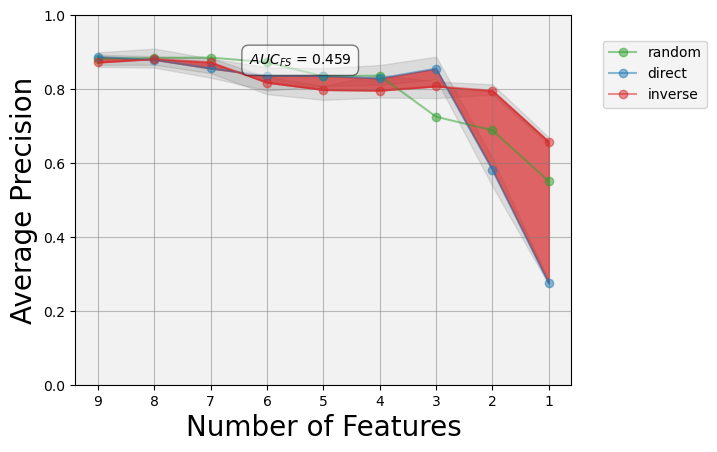

In [71]:
fix_feat_sel_plot(dataset=dataset,
                eval_model='EIF',
                model='EIF+',
                interpretation='EXIFFI+',
                scenario=1,
                save=False,
                plot_image=True)

## Fix `imp_plots`

### TO DO - Replace the `AUC_FS` box for the `feature_selection` plots of `breastw`

In [6]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyod

In [7]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('glass_DIFFI', path = data_real_path)

In [8]:
dataset.shape

(214, 9)

In [9]:
def fix_bar_plot(dataset,model,interpretation,scenario,plot_path=os.path.join(experiment_path,dataset.name,'plots_new','imp_plots'),save=True,plot_image=True):
    path=os.path.join(experiment_path,dataset.name,'experiments','global_importances',model,interpretation,f'scenario_{str(scenario)}')
    file_path=get_most_recent_file(path)
    bar_plot(dataset,file_path,plot_path=plot_path,model=model,interpretation=interpretation,scenario=scenario,save_image=save,show_plot=plot_image)

def fix_score_plot(dataset,model,interpretation,scenario,plot_path=os.path.join(experiment_path,dataset.name,'plots_new','imp_plots'),save=True,plot_image=True):
    path=os.path.join(experiment_path,dataset.name,'experiments','global_importances',model,interpretation,f'scenario_{str(scenario)}')
    file_path=get_most_recent_file(path)
    score_plot(dataset,file_path,plot_path=plot_path,model=model,interpretation=interpretation,scenario=scenario,save_image=save,show_plot=plot_image)

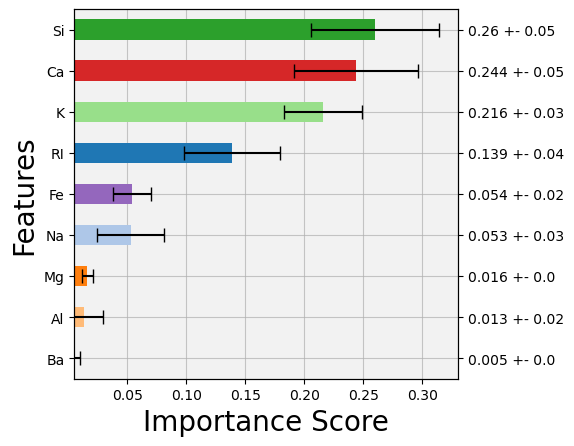

In [23]:
fix_bar_plot(dataset,'IF','RandomForest',1,save=True,plot_image=False)
plt.close()
fix_score_plot(dataset,'IF','RandomForest',1,save=True,plot_image=False)

## Fix `AUC_FS` box

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import namedtuple

In [2]:
os.chdir('../experiments/results')
models=['IF']
interpretations=['RandomForest']
scenarios=[2]
dataset_names_syn=['Xaxis','Yaxis','bisect','bisect_3d','bisect_6d']
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
dataset_names_real=['moodify']
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'

Synthetic Datasets

In [3]:
for data in dataset_names_syn:
    dataset = Dataset(data, path = data_syn_path)
    for model in models:
        for interpretation in interpretations:
            if (model=='EIF+' or model=='EIF') and interpretation=='DIFFI':
                continue
            elif (model=='IF') and (interpretation=='EXIFFI'):
                continue
            else:
                for scenario in scenarios:
                    fix_fs_file(dataset,model,interpretation,scenario)

In [4]:
path=os.path.join(os.getcwd(),dataset.name,'experiments','feature_selection','IF','RandomForest',f'scenario_{str(2)}')
file_path=get_most_recent_file(path)
open_element(file_path)

NewPrecisions(direct=array([[0.09090909, 0.09001009, 0.08827264, 0.09090909, 0.08913119,
        0.09090909, 0.08743305, 0.09090909, 0.08913115, 0.09090909],
       [0.09090909, 0.09090909, 0.08913397, 0.09001024, 0.09001058,
        0.09090909, 0.09001057, 0.09090909, 0.09001062, 0.09090909],
       [0.08913791, 0.09090909, 0.0891356 , 0.09001183, 0.09090909,
        0.09001156, 0.09001152, 0.0900114 , 0.09090909, 0.08745685],
       [0.09001241, 0.09090909, 0.08914174, 0.09090909, 0.0882972 ,
        0.08913957, 0.09090909, 0.0882956 , 0.09090909, 0.09090909],
       [0.09001282, 0.09001263, 0.08914141, 0.09001247, 0.09001277,
        0.08914103, 0.08829603, 0.08914167, 0.08914066, 0.09001266],
       [0.08747248, 0.08441495, 0.08665914, 0.08365088, 0.08914272,
        0.09001379, 0.08050409, 0.08511923, 0.09001285, 0.09001302]]), inverse=array([[0.09001003, 0.08913131, 0.09090909, 0.09090909, 0.09090909,
        0.08827173, 0.09001024, 0.09090909, 0.09090909, 0.09090909],
       [0.

Real Datasets

In [ ]:
for data in dataset_names_real:
    dataset = Dataset(data, path = data_real_path)
    for model in models:
        for interpretation in interpretations:
            if (model=='EIF+' or model=='EIF') and interpretation=='DIFFI':
                continue
            elif (model=='IF') and (interpretation=='EXIFFI'):
                continue
            else:
                for scenario in scenarios:
                    fix_fs_file(dataset,model,interpretation,scenario)

In [ ]:
dataset=Dataset('bisect_3d',path=data_syn_path)

In [ ]:
aucfs_vals=[]
value_vals=[]
for model in models:
    for interpretation in interpretations:
        if (model=='EIF+' or model=='EIF') and interpretation=='DIFFI':
            continue
        elif (model=='IF') and (interpretation=='EXIFFI'):
            continue
        else:
            for scenario in scenarios:
                value_vals.append(get_fs_file(dataset,model,interpretation,scenario).value)
                aucfs_vals.append(get_fs_file(dataset,model,interpretation,scenario).aucfs)


`cardio`

In [ ]:
dataset = Dataset('ionosphere', path = data_real_path)

In [ ]:
fix_fs_file(dataset,'IF','RandomForest',1)
fix_fs_file(dataset,'IF','RandomForest',2)

`diabetes` and `shuttle`

In [ ]:
dataset = Dataset('shuttle', path = data_real_path)

In [ ]:
fix_fs_file(dataset,'EIF+','RandomForest',2)
fix_fs_file(dataset,'IF','RandomForest',1)
fix_fs_file(dataset,'IF','RandomForest',2)

`moodify`

In [ ]:
fix_fs_file(dataset,'IF','RandomForest',1)
fix_fs_file(dataset,'IF','RandomForest',2)

## `contamination` plots

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import namedtuple

2024-03-05 11:54:16.477912: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
def fix_contamination_plot(dataset,model,save=True,change_ylim=False,plot_image=True):
    path=os.path.join(experiment_path,dataset.name,'experiments','contamination',model)
    file_path=get_most_recent_file(path)
    prec=open_element(file_path)[0]
    path_plots=os.path.join(experiment_path,dataset.name,'plots_new/contamination_plots')
    plot_precision_over_contamination(prec,dataset.name,model,path_plots,save_image=save,plot_image=plot_image,change_ylim=change_ylim)

In [4]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('breastw', path = data_real_path)

In [14]:
dataset_names=['glass','cardio','pima','ionosphere','annthyroid','pendigits','diabetes','shuttle','moodify']
for data in dataset_names:
    dataset = Dataset(data, path = data_real_path)
    fix_contamination_plot(dataset,'EIF+','EXIFFI+',2,save=True,plot_image=False,change_ylim=False)
    plt.close()

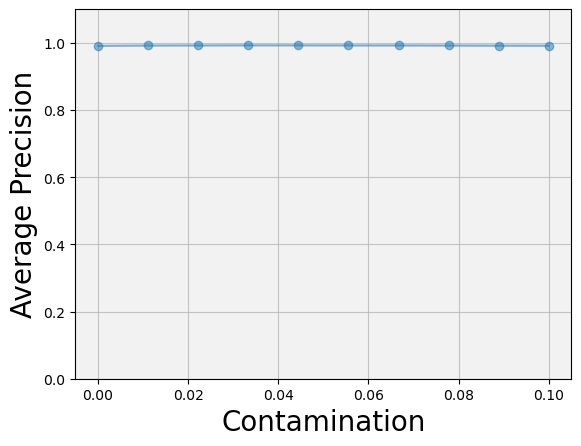

In [12]:
fix_contamination_plot(dataset,'IF',save=True,plot_image=True,change_ylim=True)

In [17]:
dataset_names_syn=['bisect','bisect_3d','bisect_6d']
for data in dataset_names_syn:
    dataset = Dataset(data, path = data_syn_path)
    fix_contamination_plot(dataset,'EIF+','EXIFFI+',2,save=True,plot_image=False,change_ylim=True)
    plt.close()

`plot_feature_selection`

In [ ]:
def print_plt_title(dataset_name,model,interpretation,scenario):
    t = time.localtime()
    current_time = time.strftime("%d-%m-%Y_%H-%M-%S", t)
    namefile = "/" + current_time + "_" + dataset_name + "_" + model + "_" + interpretation + "_feature_selection_" + str(scenario) + ".pdf"
    return namefile

In [ ]:
print_plt_title('breastw','EIF+','EXIFFI',2)

'/28-02-2024_10-04-29_breastw_EIF+_EXIFFI_feature_selection_2.pdf'

## Fix `time.pickle` file

In [8]:
import os
import sys
sys.path.append('../')
import pickle
from utils_reboot.utils import *
from utils_reboot.datasets import *

In [9]:
os.chdir('../utils_reboot')
with open(os.getcwd() + "/new_time_scenario.pickle", "rb") as file:
    dict_time = pickle.load(file)

In [3]:
dict_time.keys()

dict_keys([1, 2])

In [4]:
dict_time[1].keys()

dict_keys(['fit', 'predict', 'importances'])

In [5]:
dict_time[2].keys()

dict_keys(['fit', 'predict', 'importances'])

In [6]:
dict_time[1]['fit'].keys()

dict_keys(['EIF+', 'IF', 'DIF', 'EIF', 'sklearn_IF'])

In [7]:
dict_time[2]['fit'].keys()

dict_keys(['EIF+', 'IF', 'DIF', 'EIF', 'sklearn_IF'])

In [12]:
dict_time['predict'].keys()

dict_keys(['EIF+', 'IF', 'DIF', 'EIF', 'sklearn_IF', 'AnomalyAutoencoder'])

In [13]:
dict_time['importances'].keys()

dict_keys(['EXIFFI+', 'EXIFFI', 'DIFFI', 'RandomForest'])

In [3]:
dict_time['fit']['DIF'].keys()

dict_keys(['glass', 'wine', 'cardio', 'annthyroid', 'breastw', 'ionosphere', 'pendigits', 'moodify', 'glass_DIFFI', 'Xaxis', 'Yaxis', 'bisect', 'bisect_3d', 'bisect_6d'])

In [7]:
dict_time['fit']['AnomalyAutoencoder'].keys()

dict_keys(['glass', 'wine', 'cardio', 'annthyroid'])

(array([119.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 14.73166609,  49.15688083,  83.58209558, 118.00731032,
        152.43252506, 186.85773981, 221.28295455, 255.70816929,
        290.13338404, 324.55859878, 358.98381352]),
 <BarContainer object of 10 artists>)

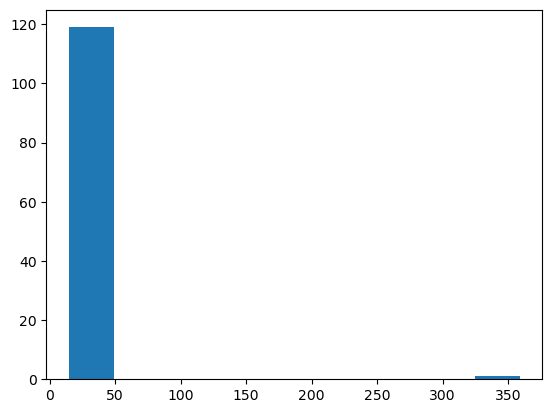

In [8]:
from matplotlib import pyplot as plt
plt.hist(dict_time['fit']['AnomalyAutoencoder']['moodify'])

In [21]:
dict_time['importances']['RandomForest'].keys()

dict_keys(['Xaxis', 'Yaxis', 'bisect', 'bisect_3d', 'bisect_6d', 'wine'])

## Doubt on `AutoEncoder`

In [1]:
import os
import sys
sys.path.append('../')
import pickle
from utils_reboot.utils import *
from utils_reboot.datasets import *
import sklearn

2024-03-05 15:17:14.366150: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('moodify', path = data_real_path)

In [5]:
dataset.downsample(max_samples=7500)
1-dataset.perc_outliers

downsampled to  7500


0.8474666666666667

`hidden_neurons=[(dataset.X.shape[1])/2, 32, 32, (dataset.X.shape[1])/2]`

In [3]:
I = AutoEncoder(hidden_neurons=[(dataset.X.shape[1])/2, 32, 32, (dataset.X.shape[1])/2], contamination=0.1, epochs=100, random_state=42,verbose=0)
dataset.split_dataset()
dataset.pre_process()
I.fit(dataset.X_train)

2024-03-05 07:28:25.112553: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


4/4 [==============================] - 0s 1ms/step


AutoEncoder()

In [4]:
y_pred=I.predict(dataset.X)
prec=sklearn.metrics.average_precision_score(dataset.y,y_pred)

5/5 [==============================] - 0s 2ms/step


In [5]:
prec

0.07691029900332226

`hidden_neurons=[(dataset.X.shape[1]), 32, 32, (dataset.X.shape[1])]`

In [7]:
I = AutoEncoder(hidden_neurons=[(dataset.X.shape[1]), 32, 32, (dataset.X.shape[1])], contamination=0.1, epochs=100, random_state=42,verbose=0)
dataset.split_dataset()
dataset.pre_process()
I.fit(dataset.X_train)

4/4 [==============================] - 0s 2ms/step


AutoEncoder()

In [8]:
y_pred=I.predict(dataset.X)
prec=sklearn.metrics.average_precision_score(dataset.y,y_pred)
prec

5/5 [==============================] - 0s 2ms/step


0.07810077519379845

`hidden_neurons=[(dataset.X.shape[1])/5, 32, 32, (dataset.X.shape[1])/5]`

In [9]:
I = AutoEncoder(hidden_neurons=[(dataset.X.shape[1])/5, 32, 32, (dataset.X.shape[1])/5], contamination=0.1, epochs=100, random_state=42,verbose=0)
dataset.split_dataset()
dataset.pre_process()
I.fit(dataset.X_train)

4/4 [==============================] - 0s 1ms/step


AutoEncoder()

In [10]:
y_pred=I.predict(dataset.X)
prec=sklearn.metrics.average_precision_score(dataset.y,y_pred)
prec

5/5 [==============================] - 0s 2ms/step


0.07691029900332226

`hidden_neurons=[(dataset.X.shape[1]), 16, 16, (dataset.X.shape[1])]`

In [3]:
I = AutoEncoder(hidden_neurons=[(dataset.X.shape[1])/10, 16, 16, (dataset.X.shape[1])/10], contamination=0.1, epochs=100, random_state=42,verbose=0)
dataset.split_dataset()
dataset.pre_process()
I.fit(dataset.X_train)
y_pred=I.predict(dataset.X)
prec=sklearn.metrics.average_precision_score(dataset.y,y_pred)
prec

2024-03-05 07:33:58.179926: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


5/5 [==============================] - 0s 1ms/step


0.07691029900332226

`pima` dataset

In [1]:
import os
import sys
sys.path.append('../')
import pickle
from utils_reboot.utils import *
from utils_reboot.datasets import *
import sklearn

2024-03-05 07:52:50.945439: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('diabetes', path = data_real_path)

In [30]:
dim_train=0.8*dataset.X.shape[0]
dataset.split_dataset()

In [32]:
np.linspace(0,0.1,10)

array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
       0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ])

In [37]:
dataset = Dataset('glass', path = data_real_path)
dataset.perc_outliers

array([0.04205607])

In [38]:
dataset.split_dataset(train_size=0.8,contamination=0.08)
dataset.y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [39]:
dataset.split_dataset(train_size=0.8,contamination=0.1)
dataset.y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

`DIF` Training

In [55]:
import os
import sys
sys.path.append('../')
import pickle
from utils_reboot.utils import *
from utils_reboot.datasets import *
import sklearn
from pyod.models.dif import DIF

In [59]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('pima', path = data_real_path)

In [60]:
dataset.shape

(768, 8)

## `glass_DIFFI` dataset

In [1]:
import os
import sys
sys.path.append('../')
import pickle
from utils_reboot.utils import *
from utils_reboot.datasets import *

2024-05-06 11:04:42.904912: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('glass_DIFFI', path = data_real_path)

In [2]:
with open('/home/davidefrizzo/Desktop/PHD/ExIFFI/data/data_DIFFI/glass_DIFFI.pkl', 'rb') as input:
    data = pickle.load(input)
data.keys()

dict_keys(['X_in', 'y_in', 'X_out_5', 'y_out_5', 'X_out_6', 'y_out_6', 'X_out_7', 'y_out_7'])

In [3]:
X_in=data['X_in']
X_in=np.r_[X_in,data['X_out_5'],data['X_out_6']]
X_out=data['X_out_7']

In [4]:
X_in.shape,X_out.shape

((185, 9), (29, 9))

In [6]:
y_in=np.zeros(X_in.shape[0])
y_out=np.ones(X_out.shape[0])
y=np.concatenate((y_in,y_out)).astype(int)
y.shape

(214,)

In [8]:
X=np.r_[X_in,X_out]
X.shape

(214, 9)

In [9]:
X=np.c_[X,y]
X.shape

(214, 10)

In [10]:
data=pd.DataFrame(X)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0.0


In [11]:
data=data.rename(columns={data.columns[-1]: 'Target'})
data.head()

,0,1,2,3,4,5,6,7,8,Target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0.0


In [2]:
data=pd.read_csv('../data/real/glass.csv')
data.head()

,0,1,2,3,4,5,6,7,8,Target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0.0


In [7]:
data.tail()

,0,1,2,3,4,5,6,7,8,Target
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,1.0
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,1.0
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,1.0
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,1.0
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,1.0


In [6]:
data.shape

(214, 10)

In [13]:
data.to_csv('/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/glass_DIFFI.csv',index=False)

In [9]:
data=pd.read_csv('/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/glass_DIFFI.csv')
data.head()

,0,1,2,3,4,5,6,7,8,Target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0.0


In [22]:
datapath='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/diabetes.csv'
T = pd.read_csv(datapath)
if 'Unnamed: 0' in T.columns:
    T = T.drop(columns=['Unnamed: 0'])
X = T.loc[:,T.columns != "Target"].to_numpy(float)
y = T.loc[:,"Target"].to_numpy(float)

In [23]:
T.head()

,age,bmi,HbA1c_level,blood_glucose_level,Target
0,80.0,25.19,6.6,140,0
1,54.0,27.32,6.6,80,0
2,28.0,27.32,5.7,158,0
3,36.0,23.45,5.0,155,0
4,76.0,20.14,4.8,155,0


In [24]:
X.shape

(100000, 4)

## Fix `scenario 1` problems 

In [13]:
path=os.path.join(experiment_path,dataset.name,'experiments','global_importances','IF','DIFFI','scenario_1')
file_path=get_most_recent_file(path)
results = open_element(file_path,filetype="npz")

file_path

'/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results/Xaxis/experiments/global_importances/IF/DIFFI/scenario_1/03-03-2024_07-16-54_.npz'

scenario 1

In [12]:
results[0,:]

array([2.07682564, 2.12910419, 1.82260592, 1.85919969, 1.58599628,
       1.80205092])

scenario 2

In [14]:
results[0,:]

array([2.51335161, 1.99402939, 1.74389572, 1.99960186, 1.99208725,
       1.93384744])

In [ ]:
feat_order = np.argsort(results.mean(axis=0))

In [ ]:
I=ExtendedIsolationForest(1)
dataset.split_dataset(train_size=1-dataset.perc_outliers,contamination=0)
I.fit(dataset.X_train)
direct = feature_selection(I, dataset, feat_order, 10, inverse=False, random=False)

### Compare Feature Selection Precisions

Scenario 1

In [19]:
path=os.path.join(experiment_path,dataset.name,'experiments','feature_selection','EIF+','IF_DIFFI','scenario_1')
file_path=get_most_recent_file(path)
results = open_element(file_path)
file_path

'/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results/Xaxis/experiments/feature_selection/EIF+/IF_DIFFI/scenario_1/09-03-2024_16-45-27_.pickle'

In [22]:
results.direct.mean(axis=1)

array([0.2629093 , 0.04742798, 0.04747022, 0.04785788, 0.04896294,
       0.05299489])

In [23]:
results.inverse.mean(axis=1)

array([0.92967876, 0.95868336, 0.97272562, 0.95843395, 0.94609585,
       0.9758874 ])

Scenario 2

In [24]:
path=os.path.join(experiment_path,dataset.name,'experiments','feature_selection','EIF+','IF_DIFFI','scenario_2')
file_path=get_most_recent_file(path)
results = open_element(file_path)
file_path

'/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results/Xaxis/experiments/feature_selection/EIF+/IF_DIFFI/scenario_2/09-03-2024_15-03-54_.pickle'

In [25]:
results.direct.mean(axis=1)

array([0.94268764, 0.95034792, 0.047452  , 0.04786494, 0.04904969,
       0.05435847])

In [26]:
results.inverse.mean(axis=1)

array([0.90878   , 0.93847953, 0.95188613, 0.96821807, 0.95431578,
       0.05568633])

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyod

2024-03-11 14:15:00.464404: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('Xaxis', path = data_syn_path)

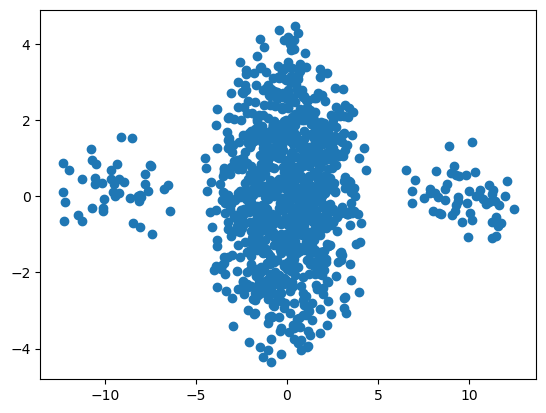

In [3]:
from matplotlib import pyplot as plt
plt.plot(dataset.X_test[:,0],dataset.X_test[:,1],'o')

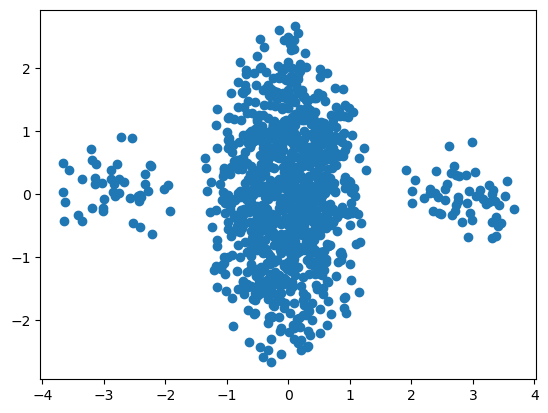

In [6]:
dataset.pre_process()
plt.plot(dataset.X_test[:,0],dataset.X_test[:,1],'o')

In [9]:
type(dataset.y.astype(int)[0])

numpy.int64

In [10]:
from pyod.models.dif import DIF
I=DIF(max_samples='auto')

In [12]:
dataset.split_dataset(train_size=1-dataset.perc_outliers,contamination=0)
I.fit(dataset.X_train)
I.predict(dataset.X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [17]:
I=ExtendedIsolationForest(1)
dataset.split_dataset(train_size=1-dataset.perc_outliers,contamination=0)
I.fit(dataset.X_train)
y_pred=I._predict(dataset.X_test,p=dataset.perc_outliers).astype(int)
y_pred[y_pred==1].shape

(100,)

## Fix Local Scoremaps

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import namedtuple

2024-03-15 12:00:27.287069: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'

### `glass_DIFFI`

`scenario 1`

In [4]:
dataset=Dataset('glass_DIFFI',path=data_real_path)
X_train=dataset.X_train
X_test=dataset.X_test
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train.shape,X_test.shape

((214, 9), (214, 9))

In [5]:
print(f'Mean learned by the scaler:\n\n{scaler.mean_}')
print(f'Scale learned by the scaler:\n\n{scaler.scale_}')

Mean learned by the scaler:

[1.51836542e+00 1.34078505e+01 2.68453271e+00 1.44490654e+00
 7.26509346e+01 4.97056075e-01 8.95696262e+00 1.75046729e-01
 5.70093458e-02]
Scale learned by the scaler:

[0.00302976 0.81469337 1.43903379 0.49810176 0.77273399 0.65066625
 1.41982447 0.49605617 0.09721077]


In [6]:
X_test[:,7].min(),X_test[:,7].max()

(-0.35287682825777533, 5.997210462947946)

`scenario 2`

In [7]:
dataset = Dataset('glass_DIFFI', path = data_real_path)
dataset.split_dataset(train_size=1-dataset.perc_outliers,contamination=0.1)
X_train=dataset.X_train
X_test=dataset.X_test
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train.shape,X_test.shape

((185, 9), (214, 9))

In [8]:
print(f'Mean learned by the scaler:\n\n{scaler.mean_}')
print(f'Scale learned by the scaler:\n\n{scaler.scale_}')

Mean learned by the scaler:

[1.51852103e+00 1.33649730e+01 2.78913514e+00 1.40448649e+00
 7.26365405e+01 4.77945946e-01 9.00145946e+00 1.41513514e-01
 6.11351351e-02]
Scale learned by the scaler:

[0.00312501 0.80421667 1.36142982 0.48259757 0.76430285 0.51690043
 1.45188174 0.46782866 0.09900209]


In [10]:
X_train[:,7].min(),X_train[:,7].max()

(-0.30249004727380313, 6.430744293780775)

### `annthyroid`

`scenario 1`

In [11]:
dataset=Dataset('annthyroid',path=data_real_path)
X_train=dataset.X_train
X_test=dataset.X_test
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train.shape,X_test.shape

((7200, 6), (7200, 6))

In [12]:
X_test[:,1].min(),X_test[:,1].max()

(-0.21157051478773975, 22.854276518105)

`scenario 2`

In [26]:
dataset = Dataset('annthyroid', path = data_real_path)
dataset.drop_duplicates()
dataset.split_dataset(train_size=1-dataset.perc_outliers,contamination=0.1)
X_train=dataset.X_train
X_test=dataset.X_test
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train.shape,X_test.shape

((6528, 6), (7062, 6))

In [27]:
X_test[:,1].min(),X_test[:,1].max()

(-0.21422598104313106, 21.83273787799719)

`scenario X`

In [21]:
dataset = Dataset('annthyroid', path = data_real_path)
dataset.split_dataset(train_size=1-dataset.perc_outliers,contamination=0.1)
dataset.X_train=scaler.fit_transform(dataset.X_train)
dataset.X_test=scaler.transform(dataset.X_test)
X_train.shape,X_test.shape

((7200, 6), (7200, 6))

In [23]:
dataset.X_test[:,1].min(),dataset.X_test[:,1].max()

(-0.21395748797216155, 22.027775162409704)

### `moodify`

`scenario 1`

In [15]:
dataset=Dataset('moodify',path=data_real_path)
X_train=dataset.X_train
X_test=dataset.X_test
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train.shape,X_test.shape

((277938, 11), (277938, 11))

In [16]:
X_test[:,3].min(),X_test[:,3].max()

(-7.439458489593187, 2.2850072635989473)

`scenario 2`

In [17]:
dataset = Dataset('moodify', path = data_real_path)
dataset.split_dataset(train_size=1-dataset.perc_outliers,contamination=0.1)
X_train=dataset.X_train
X_test=dataset.X_test
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train.shape,X_test.shape

((235552, 11), (277938, 11))

In [18]:
X_test[:,3].min(),X_test[:,3].max()

(-8.319246974544443, 2.410881440810128)

In [43]:
scaler.mean_

array([0.52051815, 0.0048614 , 0.01997678, 0.10943013, 0.09783792,
       0.11321468])

In [44]:
scaler.scale_

array([0.18925622, 0.0229777 , 0.00753864, 0.03596606, 0.0190832 ,
       0.03609507])

`scenario 2`

In [45]:
dataset = Dataset('annthyroid', path = data_real_path)
dataset.split_dataset(train_size=1-dataset.perc_outliers,contamination=0.1)
X_train=dataset.X_train
X_test=dataset.X_test
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [48]:
X_train.shape,X_test.shape

((6666, 6), (7200, 6))

In [46]:
scaler.mean_

array([0.52084619, 0.00508833, 0.01992852, 0.10915336, 0.09780168,
       0.11293173])

In [47]:
scaler.scale_

array([0.18895669, 0.02385244, 0.00738003, 0.03616974, 0.01911956,
       0.03587362])

In [40]:

dataset.split_dataset(train_size=1-dataset.perc_outliers,contamination=0)
dataset.pre_process()
glass_df_preprocess=pd.DataFrame(dataset.X_test)
glass_df_preprocess.head() 

,0,1,2,3,4,5
0,1.119188,-0.295606,-0.721676,0.226024,-0.817040,0.866014
1,-1.471451,-0.364693,1.288860,0.891917,1.836232,-0.235768
2,-0.255437,-0.038998,0.484646,-0.295109,1.732182,-1.105595
3,0.643357,-0.236389,-0.453604,-1.018906,-0.400840,-0.902635
4,-1.524322,-0.364693,0.752717,0.776110,-0.400840,1.068974


In [41]:
glass_df_preprocess[1].min(),glass_df_preprocess[1].max()

(-0.41404087005029216, 104.20320691396932)

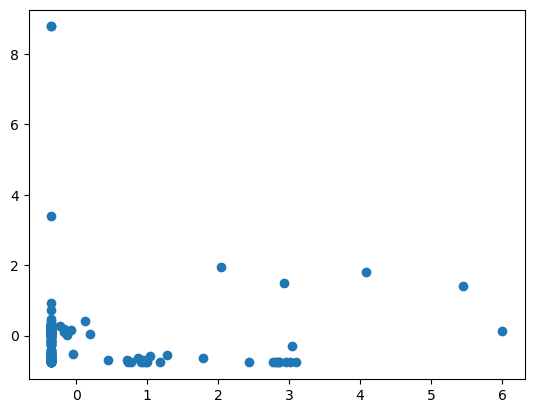

In [30]:
plt.scatter(glass_df_preprocess[7],glass_df_preprocess[5])
plt.show()

### `moodify`

In [22]:
dataset=Dataset('moodify',path=data_real_path)

`scenario 2`

In [24]:
dataset.split_dataset(train_size=1-dataset.perc_outliers,contamination=0.1)
X_train=dataset.X_train
X_test=dataset.X_test
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train.shape,X_test.shape

((235552, 11), (277938, 11))

In [25]:
X_test[:,3].min(),X_test[:,3].max()

(-8.336501954322232, 2.414570992599634)

## Try `ECOD` and `KNN` 

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from pyod.models.ecod import ECOD
from pyod.models.knn import KNN

2024-03-15 08:55:35.479636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
dataset = Dataset('moodify', path = data_real_path)

## `EIF+ - EIF` contamination plot

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyod

2024-03-25 07:21:55.717946: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'

### `Xaxis`

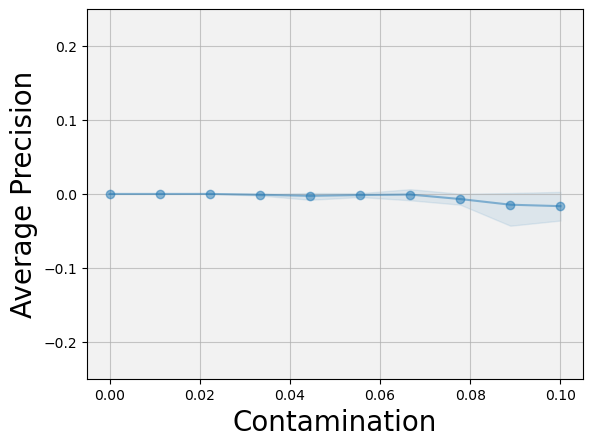

In [4]:
dataset=Dataset('Xaxis',path='../data/syn/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.25))

### `Yaxis`

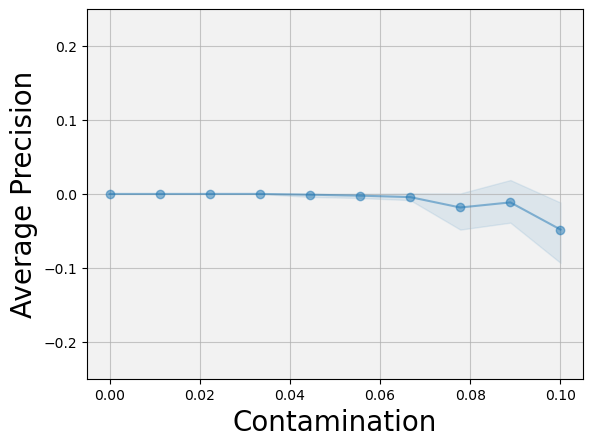

In [12]:
dataset=Dataset('Yaxis',path='../data/syn/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.25))

### `bisect`

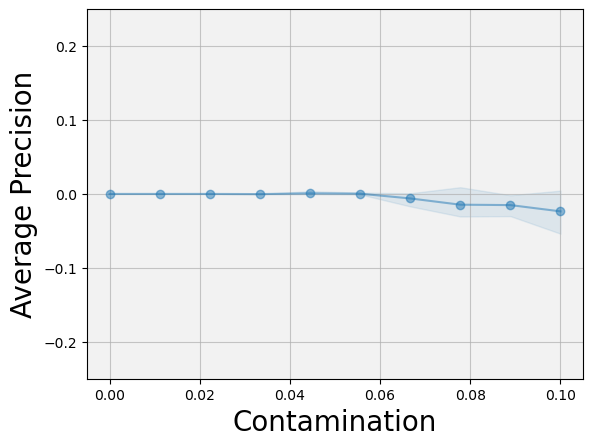

In [13]:
dataset=Dataset('bisect',path='../data/syn/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.25),
                                box_loc=(0.06,0.2))

### `bisect_3d`

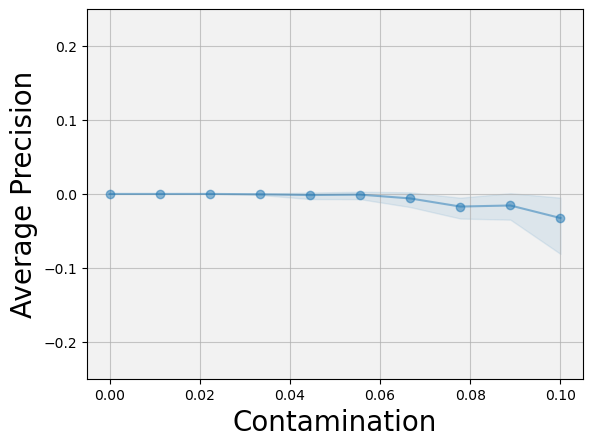

In [5]:
dataset=Dataset('bisect_3d',path='../data/syn/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.25),
                                box_loc=(0.06,0.2))

### `bisect_6d`

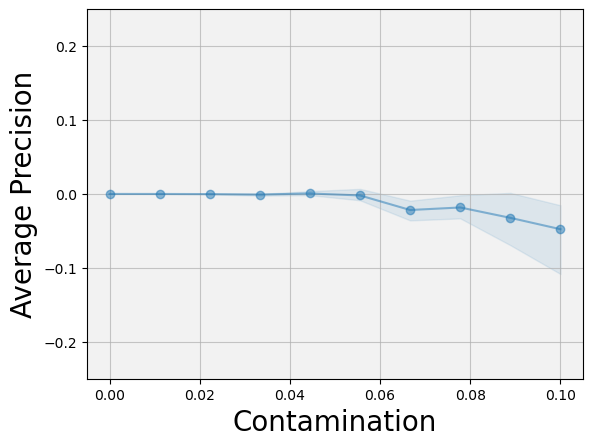

In [6]:
dataset=Dataset('bisect_6d',path='../data/syn/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.25),
                                box_loc=(0.06,0.2))

### `wine`

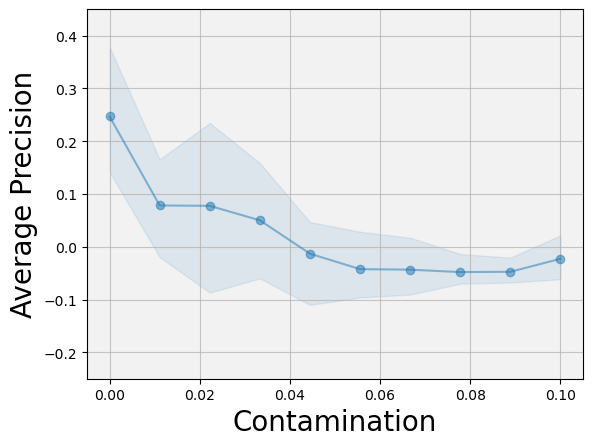

In [6]:
dataset=Dataset('wine',path='../data/real/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.45),
                                box_loc=(0.06,0.2))

### `breastw`

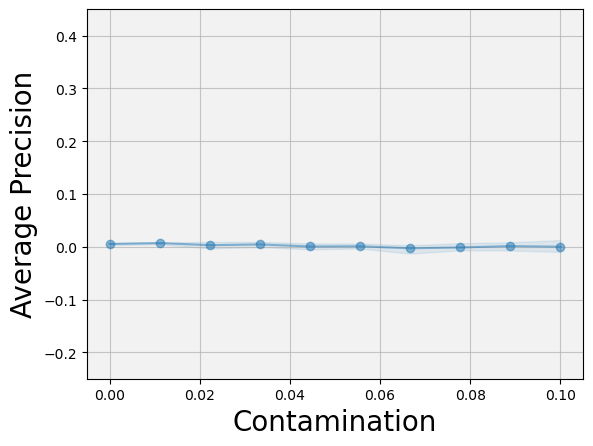

In [3]:
dataset=Dataset('breastw',path='../data/real/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.45),
                                box_loc=(0.06,0.2))

### `pima`

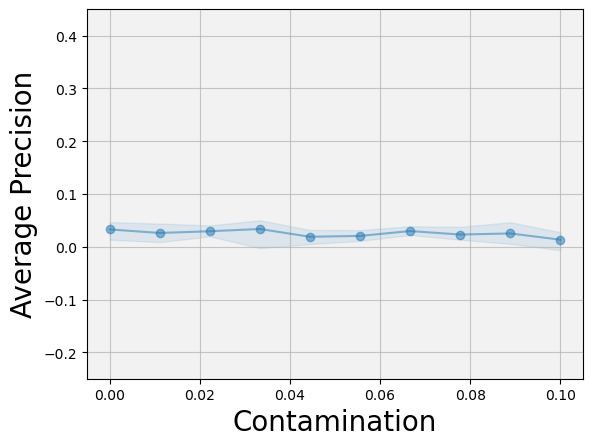

In [6]:
dataset=Dataset('pima',path='../data/real/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.45),
                                box_loc=(0.06,0.2))

### `cardio`

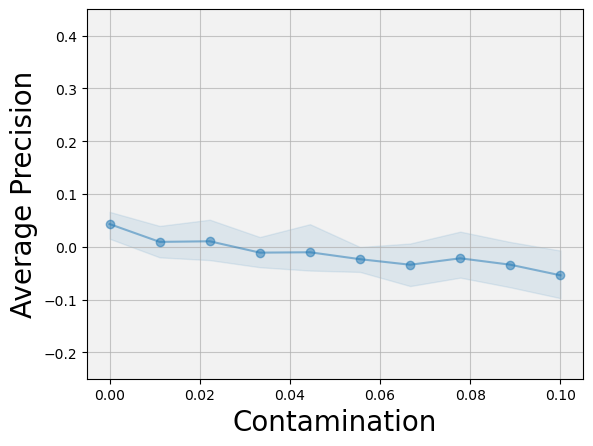

In [7]:
dataset=Dataset('cardio',path='../data/real/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.45),
                                box_loc=(0.06,0.2))

### `ionosphere`

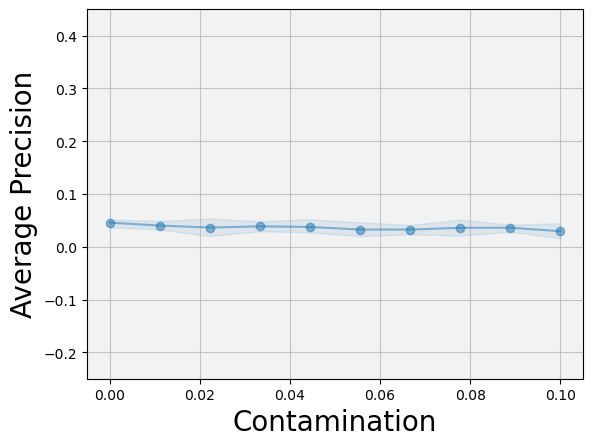

In [41]:
dataset=Dataset('ionosphere',path='../data/real/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.45),
                                box_loc=(0.06,0.2))

### `glass_DIFFI`

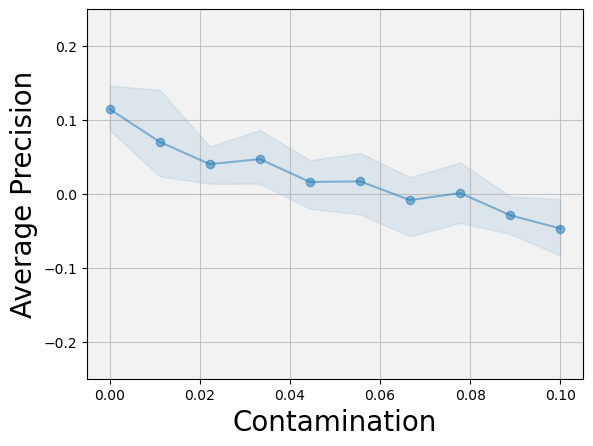

In [7]:
dataset=Dataset('glass_DIFFI',path='../data/real/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.25),
                                box_loc=(0.06,0.2))

### `annthyroid`

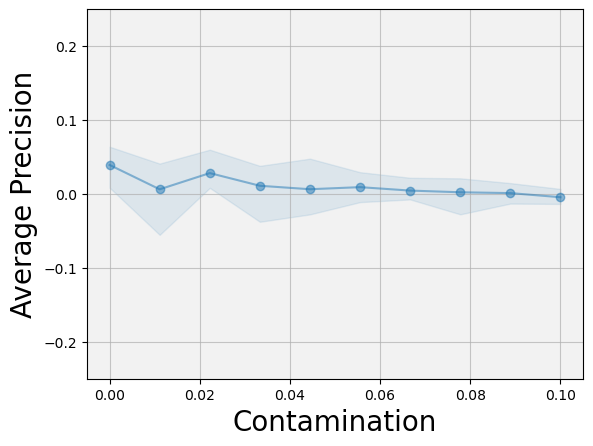

In [8]:
dataset=Dataset('annthyroid',path='../data/real/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.25),
                                box_loc=(0.06,0.2))

### `pendigits `

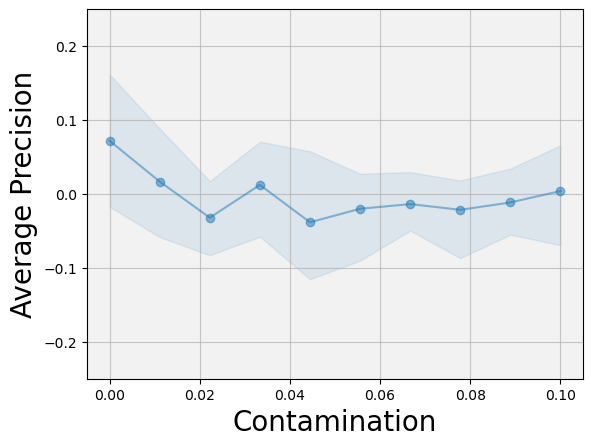

In [56]:
dataset=Dataset('pendigits',path='../data/real/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.25),
                                box_loc=(0.06,0.2))

### `shuttle`

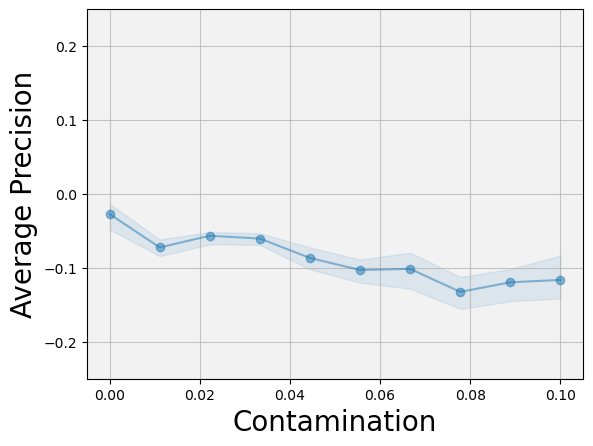

In [63]:
dataset=Dataset('shuttle',path='../data/real/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.25),
                                box_loc=(0.06,0.2))

### `diabetes`

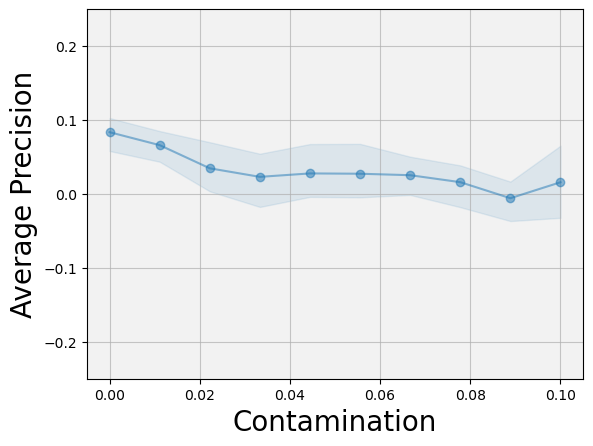

In [24]:
dataset=Dataset('diabetes',path='../data/real/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.25),
                                box_loc=(0.06,0.2))

### `moodify`

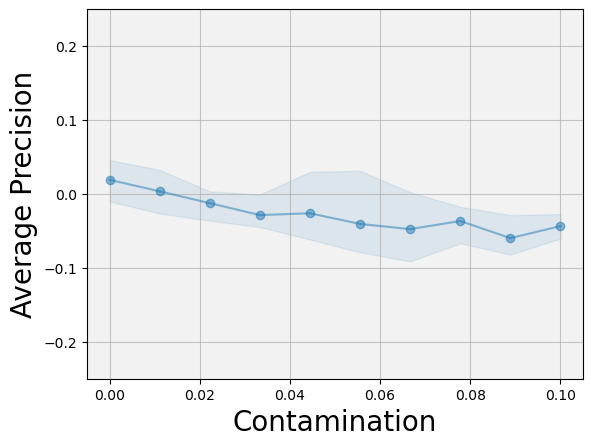

In [9]:
dataset=Dataset('moodify',path='../data/real/')
plot_path=os.path.join(experiment_path,dataset.name,'plots_new','contamination_plots')
precisions=get_contamination_comparison('EIF+','EIF',dataset.name,path='../experiments')
plot_precision_over_contamination(precisions,
                                dataset.name,
                                'EIF+_minus_EIF',
                                plot_path=plot_path,
                                save_image=True,
                                plot_image=True,
                                ylim=(-0.25,0.25),
                                box_loc=(0.06,0.2))

## `DIF` vs `glass_DIFFI`

In [14]:
import os
import sys
sys.path.append('../')
import pickle
from utils_reboot.utils import *
from utils_reboot.datasets import *

In [15]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('glass_DIFFI', path = data_real_path)

`scenario 2` pre process

In [ ]:
from pyod.models.dif import DIF
dataset.drop_duplicates()
dataset.split_dataset(train_size=1-dataset.perc_outliers,contamination=0)
dataset.pre_process()
I=DIF()
I.fit(dataset.X_train)
y_pred=I.predict(dataset.X_test)
y_pred

## Create `json` file for feature names

In [8]:
import json 
import pandas as pd
data_feature_names={
    'pima': ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age'],
    'moodify': ['duration (ms)', 'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'spec_rate'],
    'diabetes': ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'],
    'glass': ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'],
    'wine': ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium','Phenols',
            'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
}

with open('../data/data_feature_names.json',"w") as file:
    json.dump(data_feature_names,file)

## Fix `get_most_recent_file` function

In [1]:
import os
cwd=os.path.dirname(os.getcwd())
cwd

'/home/davidefrizzo/Desktop/PHD/ExIFFI'

In [10]:
path=os.path.join(cwd,'experiments','results','bisect_3d','experiments','feature_selection',
                  'EIF+','random','scenario_2')
files=os.listdir(path)  
files

['12-03-2024_21-30-25_.pickle', '08-05-2024_14-02-06_.pickle']

In [11]:
get_most_recent_file(path)

'/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results/bisect_3d/experiments/feature_selection/EIF+/random/scenario_2/08-05-2024_14-02-06_.pickle'

In [12]:
open_element(get_most_recent_file(path))

Precisions_random(random=array([[1.        , 1.        , 1.        , 1.        , 0.99951538,
        1.        , 1.        , 1.        , 0.99961538, 1.        ],
       [1.        , 0.99679317, 0.99087615, 0.99825114, 0.99669461,
        1.        , 1.        , 1.        , 0.99554561, 1.        ],
       [1.        , 0.99941462, 0.78051225, 0.79270117, 1.        ,
        0.92249658, 0.99281932, 0.99990099, 0.99917903, 0.99892857],
       [1.        , 0.8334533 , 0.94991015, 1.        , 0.04832417,
        0.04860031, 1.        , 0.88211336, 0.04865903, 0.90257423],
       [0.93666699, 0.05066569, 1.        , 0.05093552, 0.90834429,
        0.93195417, 0.97112985, 0.91699456, 1.        , 0.05244495],
       [0.05765451, 0.0583632 , 0.97684192, 0.05752394, 0.97841162,
        0.05626863, 0.99154739, 0.05988681, 0.98998859, 0.05719808]]), dataset='bisect_3d', model='EIF+')

## Difference `Yaxis` and `Xaxis`

In [4]:
import os
import sys
import glob
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyod

2024-05-12 07:54:45.487448: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
cwd=os.path.dirname(os.getcwd())
cwd

'/home/davidefrizzo/Desktop/PHD/ExIFFI'

`Xaxis`

In [17]:
path=os.path.join(cwd,'experiments','results','Xaxis','experiments','global_importances',
                  'IF','EXIFFI','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
filepath

'/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results/Xaxis/experiments/global_importances/IF/EXIFFI/scenario_2/06-05-2024_18-01-20_.npz'

In [18]:
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([0, 5, 3, 4, 2, 1])

`Yaxis IF_EXIFFI`

In [5]:
path=os.path.join(cwd,'experiments','results','Yaxis','experiments','global_importances',
                  'IF','EXIFFI','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([5, 4, 0, 1, 3, 2])

`Yaxis IF_RandomForest`

In [6]:
path=os.path.join(cwd,'experiments','results','Yaxis','experiments','global_importances',
                  'IF','RandomForest','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([5, 0, 1, 4, 3, 2])

`shuttle IF_EXIFFI`

In [9]:
path=os.path.join(cwd,'experiments','results','shuttle','experiments','global_importances',
                  'IF','EXIFFI','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([5, 3, 1, 2, 6, 7, 4, 0, 8])

`shuttle EIF_RandomForest`

In [11]:
path=os.path.join(cwd,'experiments','results','shuttle','experiments','global_importances',
                  'EIF','RandomForest','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([3, 1, 4, 5, 6, 7, 2, 0, 8])

`shuttle EIF+_RandomForest`

In [12]:
path=os.path.join(cwd,'experiments','results','shuttle','experiments','global_importances',
                  'EIF+','RandomForest','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([3, 5, 1, 8, 4, 2, 6, 7, 0])

`shuttle EIF_EXIFFI`

In [10]:
path=os.path.join(cwd,'experiments','results','shuttle','experiments','global_importances',
                  'EIF','EXIFFI','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([6, 2, 4, 7, 1, 5, 3, 0, 8])

`shuttle EIF+_EXIFFI+`

In [13]:
path=os.path.join(cwd,'experiments','results','shuttle','experiments','global_importances',
                  'EIF+','EXIFFI+','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([7, 4, 1, 2, 8, 3, 5, 0, 6])

In [ ]:
path=os.path.join(cwd,'experiments','results','Yaxis','experiments','global_importances',
                  'IF','RandomForest','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

`moodify` `IF_EXIFFI`

In [29]:
dataset = Dataset('moodify', path = data_real_path,feature_names_filepath='../data/')
path=os.path.join(cwd,'experiments','results','moodify','experiments','global_importances',
                  'IF','EXIFFI','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([ 7,  8,  9,  0,  5,  1,  4, 10,  2,  6,  3])

`moodify EIF_EXIFFI`

In [33]:
path=os.path.join(cwd,'experiments','results','moodify','experiments','global_importances',
                  'EIF','EXIFFI','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([ 8,  9,  5,  6,  7,  2,  1,  0,  4, 10,  3])

Try to recompute the GFI scores → file `08-05-2024_16-48-47_.npz`

In [44]:
path=os.path.join(cwd,'experiments','results','moodify','experiments','global_importances',
                  'EIF','EXIFFI','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([ 9,  8,  5,  2,  1,  7,  4, 10,  6,  0,  3])

`moodify EIF+_EXIFFI+`

In [30]:
path=os.path.join(cwd,'experiments','results','moodify','experiments','global_importances',
                  'EIF+','EXIFFI+','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([ 8,  9,  5,  1,  6,  2,  7,  0,  4, 10,  3])

Try to recompute the GFI scores → file `08-05-2024_16-45-44_.npz`

In [42]:
path=os.path.join(cwd,'experiments','results','moodify','experiments','global_importances',
                  'EIF+','EXIFFI+','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([ 1,  9,  5,  4,  6,  0, 10,  7,  8,  3,  2])

Try to recompute the GFI scores → file `08-05-2024_16-57-55_.npz`

In [47]:
path=os.path.join(cwd,'experiments','results','moodify','experiments','global_importances',
                  'EIF+','EXIFFI+','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([ 9,  7,  5,  8,  6,  1,  2,  0,  4, 10,  3])

`moodify IF_RandomForest`

In [31]:
path=os.path.join(cwd,'experiments','results','moodify','experiments','global_importances',
                  'IF','RandomForest','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([ 9,  2,  8,  0,  5,  1,  7, 10,  4,  6,  3])

`EIF_RandomForest`

In [34]:
path=os.path.join(cwd,'experiments','results','moodify','experiments','global_importances',
                  'EIF','RandomForest','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([ 8,  5,  2,  9,  1,  0, 10,  7,  4,  6,  3])

`EIF+_RandomForest`

In [37]:
path=os.path.join(cwd,'experiments','results','moodify','experiments','global_importances',
                  'EIF+','RandomForest','scenario_2')
files=os.listdir(path)  
filepath=get_most_recent_file(path,filetype="npz")
imp_mat=open_element(filepath,filetype="npz")
np.argsort(imp_mat.mean(axis=0))

array([ 2,  8,  5,  9, 10,  1,  0,  7,  4,  6,  3])

### Function `glob`

In [5]:
path=os.path.join(cwd,'data','real')
os.listdir(path)

['wine.mat',
 'breastw.mat',
 'pima.mat',
 'annthyroid.mat',
 'ionosphere.mat',
 'diabetes.csv',
 'glass.csv',
 'cardio.mat',
 'pendigits.mat',
 'pima.csv',
 'shuttle.mat',
 'glass_old.mat',
 'moodify.csv']

In [6]:
import glob
filepaths=glob.glob(path+'/*.csv')

In [12]:
os.path.basename(filepaths[0]).startswith('diabetes')

True

In [13]:
file_name='pima'
index = [i for i, path in enumerate(filepaths) if os.path.basename(path).startswith(file_name)]
index

[2]